In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
#Read Dataset
df = pd.read_csv(r'C:\Users\JISHNU JAYASANKAR\Desktop\DSA_files\Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
#Information About Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
#Checking Null Values
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# 1

Table has no Null Values

In [6]:
#Statistic Summary About The Dataset
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


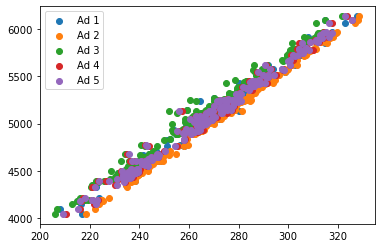

In [7]:
#Drawing the Scatter Plot of amount spend for ads and profit
plt.scatter(df['Add1(in Thousands)'],df['Profit(in Thousands)'],label='Ad 1')
plt.scatter(df['Add2(in Thousands)'],df['Profit(in Thousands)'],label='Ad 2')
plt.scatter(df['Add3(in Thousands)'],df['Profit(in Thousands)'],label='Ad 3')
plt.scatter(df['Add4(in Thousands)'],df['Profit(in Thousands)'],label='Ad 4')
plt.scatter(df['Add5(in Thousands)'],df['Profit(in Thousands)'],label='Ad 5')
plt.legend()

<AxesSubplot:>

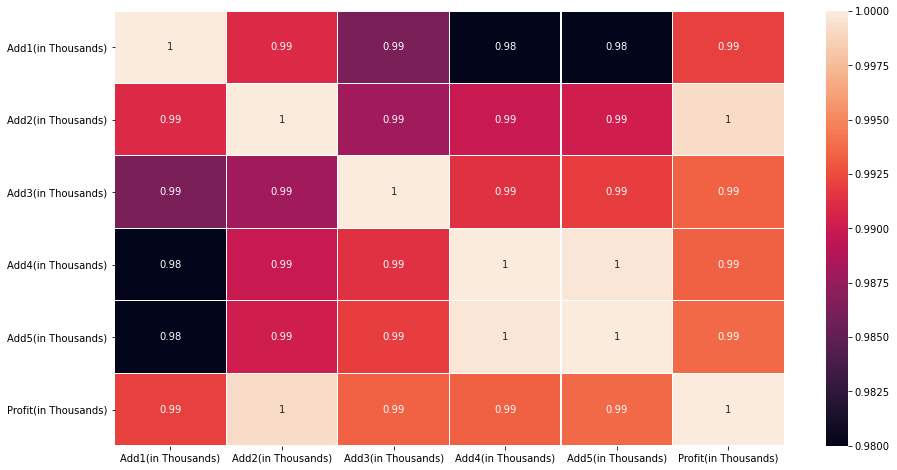

In [8]:
#Plotting a Correlation Matrix
corrmatrics = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrmatrics,annot=True,vmin=.98,vmax=1,linewidth=0.2)

The profit is increasing while the amount spent for ads increasing.  
So these Shows a Highly Positive Correlation.  
And There is a continous Relationship between Amount Spent to the Advertisement and Profit 


# 2

In [9]:
#Features in Dataset
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [10]:
#Dependent variable (Profit)
y=df['Profit(in Thousands)']
#Independent Variable (Amount Spent for Different Ad Companies)
x=df.drop(['Date','Profit(in Thousands)'],axis=1)

In [11]:
x.shape

(205, 5)

In [12]:
y.shape

(205,)

In [13]:
#Split the dataset into trian and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.25)

In [14]:
#Create A Model
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [15]:
#Assign the training data into model
model = lr.fit(x_train,y_train)

In [16]:
#Predicting data using x_test 
predictions = model.predict(x_test)

In [17]:
#Actual Values
print(y_test)

78     5057.155
97     4648.834
151    5146.949
44     4648.627
40     4486.996
67     5001.615
98     4569.293
18     4190.965
152    5065.652
62     5234.487
4      4350.683
172    5789.791
197    5616.186
38     4486.380
29     4482.183
170    5728.804
190    5917.925
33     4513.600
136    4915.682
145    5108.626
173    5805.521
31     4617.695
11     4435.571
119    5227.886
169    5730.999
34     4461.325
84     4925.861
184    5962.336
120    5182.368
35     4419.421
163    5267.657
28     4416.136
16     4175.677
130    4922.845
116    5395.217
182    5956.323
27     4453.773
47     4519.061
58     5133.766
204    5421.842
138    5247.011
106    5430.790
90     4887.296
147    5175.051
185    5903.253
95     4623.793
73     4936.120
51     4477.226
117    5359.346
103    5498.553
69     5030.451
107    5452.280
Name: Profit(in Thousands), dtype: float64


In [18]:
#Predicted Values
predictions

array([5057.155, 4648.834, 5146.949, 4648.627, 4486.996, 5001.615,
       4569.293, 4190.965, 5065.652, 5234.487, 4350.683, 5789.791,
       5616.186, 4486.38 , 4482.183, 5728.804, 5917.925, 4513.6  ,
       4915.682, 5108.626, 5805.521, 4617.695, 4435.571, 5227.886,
       5730.999, 4461.325, 4925.861, 5962.336, 5182.368, 4419.421,
       5267.657, 4416.136, 4175.677, 4922.845, 5395.217, 5956.323,
       4453.773, 4519.061, 5133.766, 5421.842, 5247.011, 5430.79 ,
       4887.296, 5175.051, 5903.253, 4623.793, 4936.12 , 4477.226,
       5359.346, 5498.553, 5030.451, 5452.28 ])

Predicted values are equal to the Actual values. So Model is worked Successfully and Accuratly

In [37]:
#Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
print('MSE is: ' ,mean_squared_error(y_test,predictions))

MSE is:  1.0498830851634581e-24


# 3

Amount Spent For Different Ad Companies  
Add1(in Thousands) 290  
Add2(in Thousands) 312  
Add3(in Thousands) 309  
Add4(in Thousands) 298  
Add5(in Thousands) 320  

In [42]:
#predicting the Profit
prediction = model.predict([[290,312,309,298,320]])
print(prediction)

[5820.06]


In this Case, the model predict the company will the get profit 5820.06 